### Correlation 筛选

#### correlation的计算参考 all_correlation_cal.py，这里直接提取

In [68]:
vif_corr = pd.read_csv('D:\\REITS研究数据\\vif_subset_correlation.csv',index_col=[0])

In [ ]:
vif_abnormal = vif_corr.loc[:, vif_corr.applymap(lambda x: (x>0.8) & (x!=1)).sum(axis=0) == 1]
vif_abnormal.style.apply(lambda x: ["background: red" if v > 0.8 else "" for v in x], axis = 1)

In [118]:
vif_abnormal = vif_corr.loc[:, vif_corr.applymap(lambda x: (x<-0.8) & (x!=1)).sum(axis=0) == 1]
vif_abnormal.style.apply(lambda x: ["background: red" if v <- 0.8 else "" for v in x], axis = 1)

In [119]:
vif_transform[(vif_transform['index'] == '950229.SH_ytm') | (vif_transform['index'] == '508019.SH_large_trans_ret_prev')]

index       VIF
1                    950229.SH_ytm  9.374859
33  508019.SH_large_trans_ret_prev  6.005084

In [120]:
vif_transform[(vif_transform['index'] == '950219CNY01.CSI_low') | (vif_transform['index'] == 'N11077.CSI_ytm')]

index       VIF
7   950219CNY01.CSI_low  7.690894
14       N11077.CSI_ytm  7.057830

In [121]:
vif_corr_subset = vif_transform[(vif_transform['index'] != '950229.SH_ytm') & (vif_transform['index'] !='508019.SH_ind_park_dacce_prev')
                               & (vif_transform['index'] != '950219CNY01.CSI_low') & (vif_transform['index'] != '630103.CCI_high')]

In [139]:
vif_corr_subset.index = range(len(vif_corr_subset))
vif_corr_subset.to_csv('D:\\REITS研究数据\\vif_corr_subset_data.csv')

#### 接下来correlation计算参考 all_correlation_cal.py，此处直接提取

In [2]:
import pandas as pd
vif_corr_subset_corr = pd.read_csv('D:\\REITS研究数据\\vif_corr_subset_correlation.csv',index_col=[0])

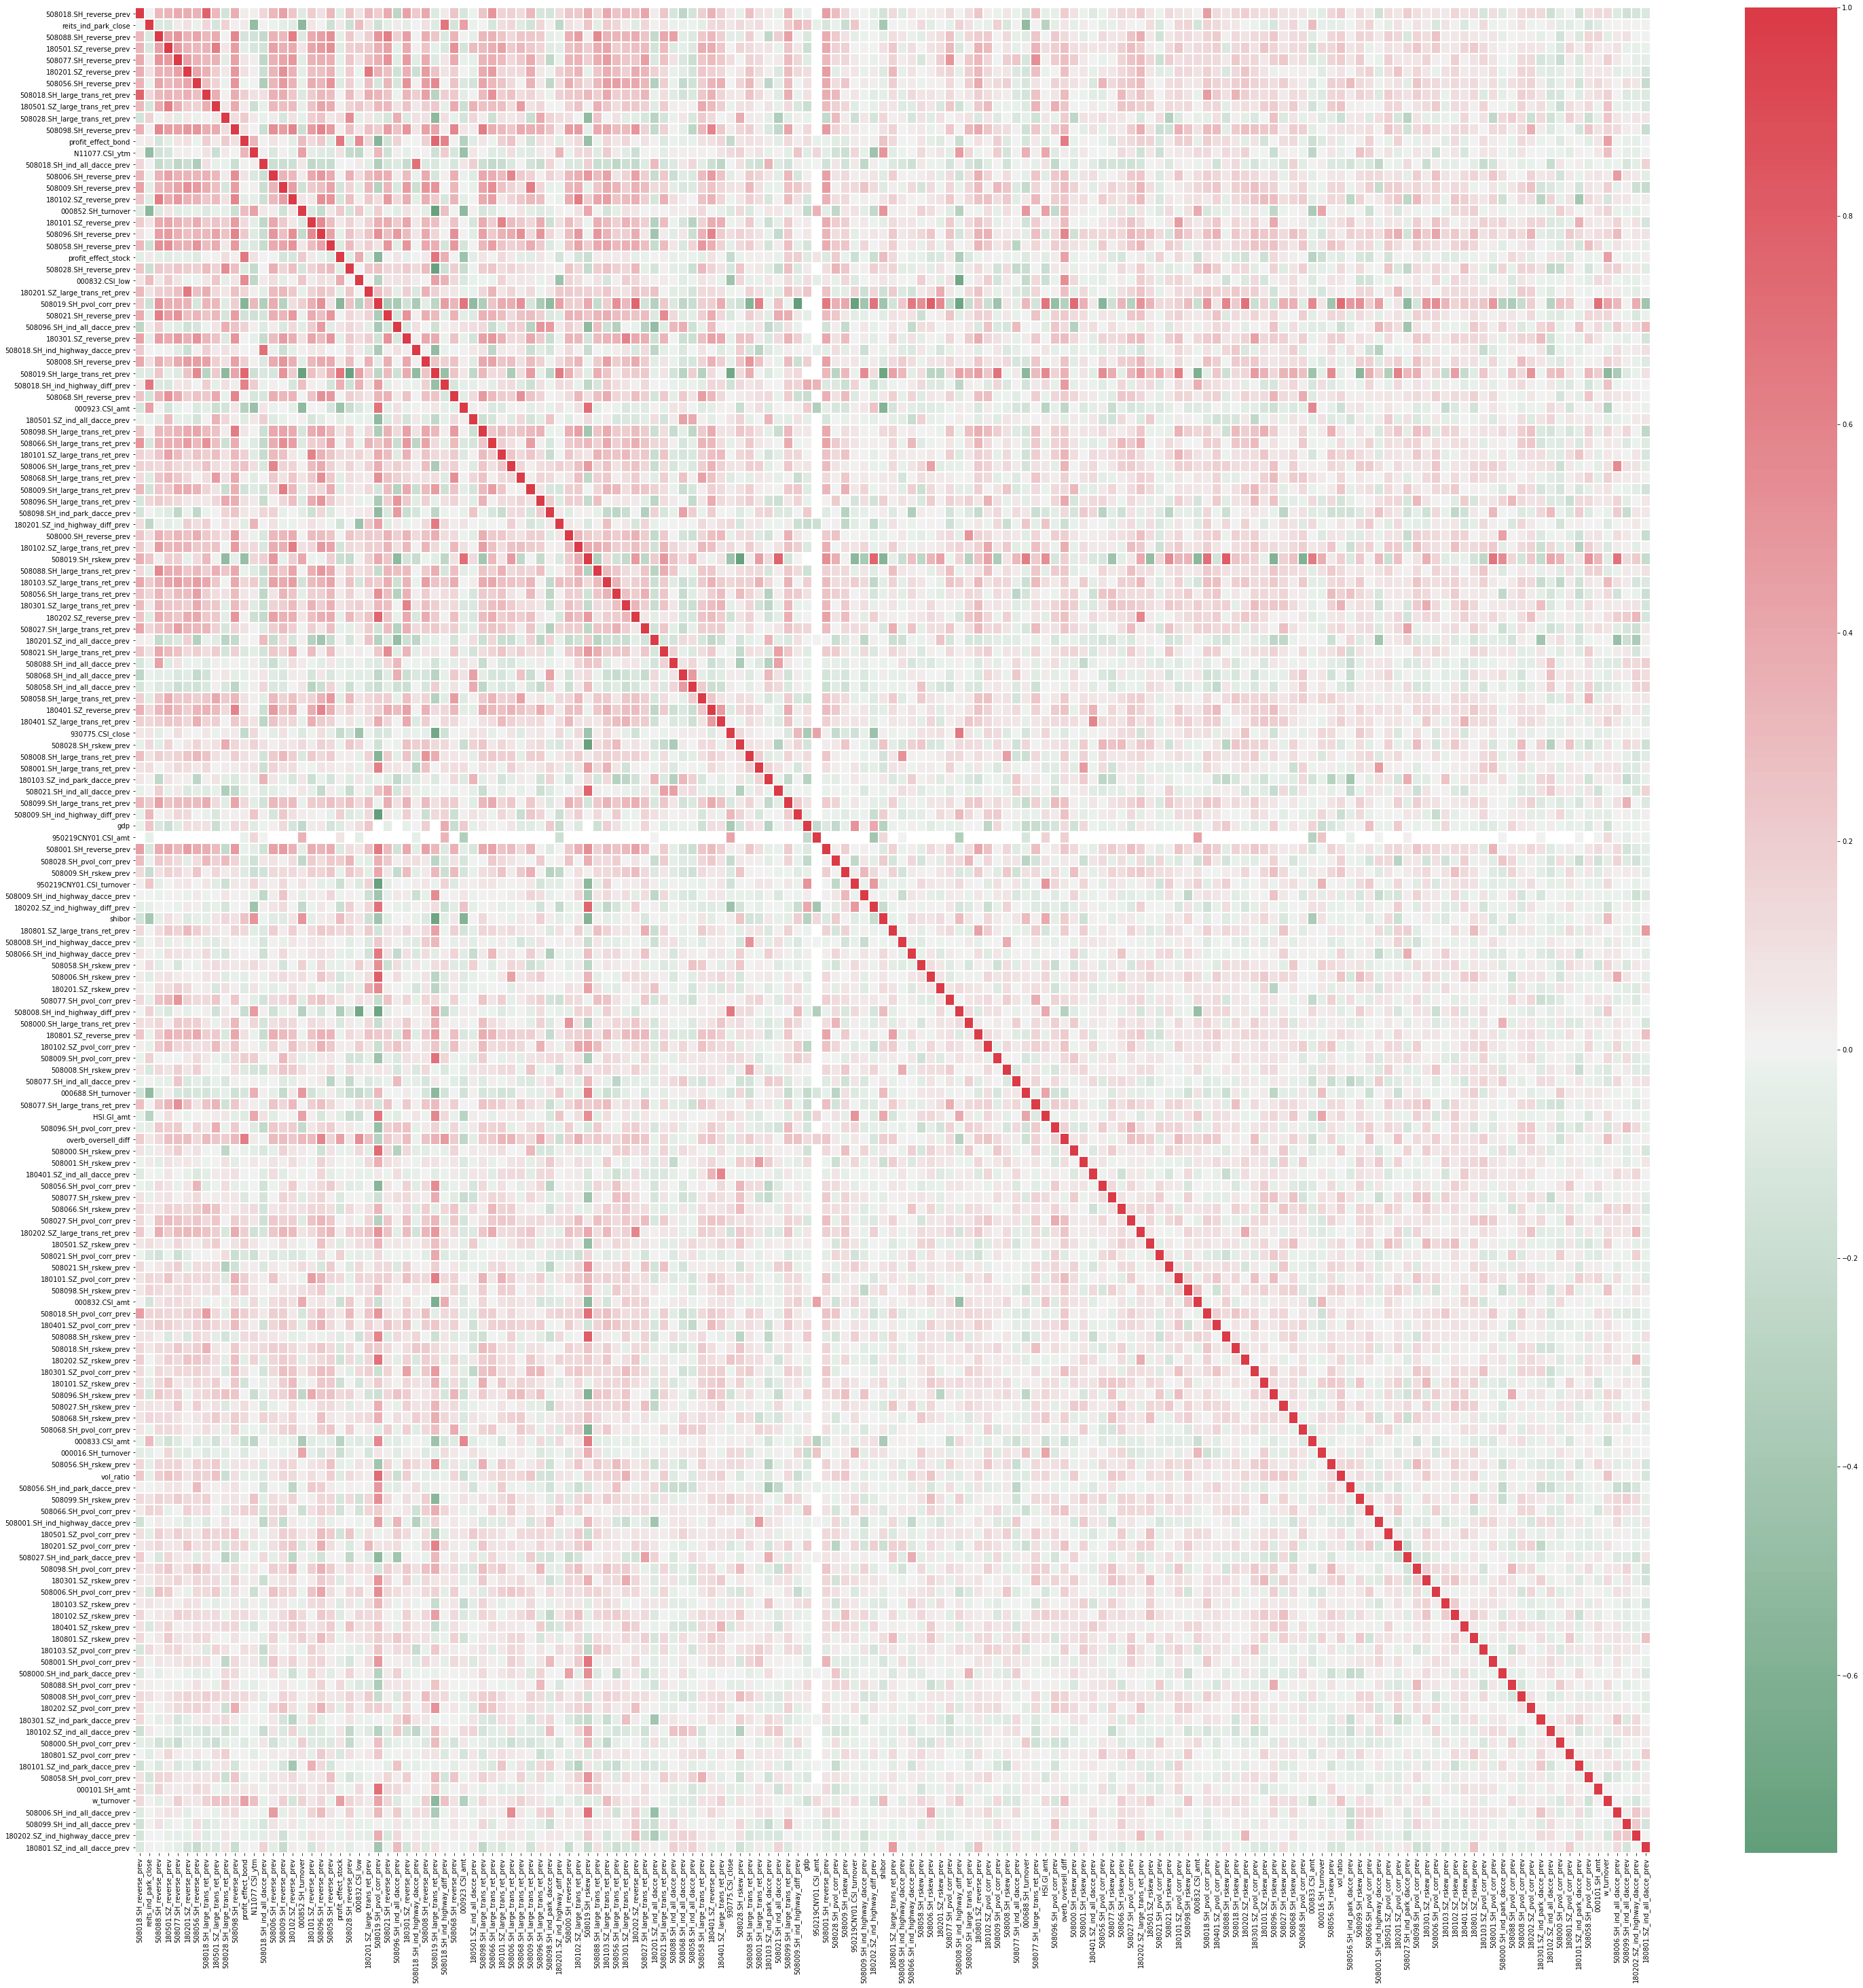

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 50))

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if you want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)

ans=sns.heatmap(vif_corr_subset_corr, linewidths=1, cmap=cmap, center=0)

#save image 
figure = ans.get_figure()    
figure.savefig('vif_corr_subset_corr.png')

In [126]:
import seaborn as sns
cm = sns.light_palette("red",as_cmap=True)
vif_corr_subset_corr.style.background_gradient(cmap=cm)